# Showing Receptive Fields

### Environment Setup

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from dandi import dandiapi
from pynwb import NWBHDF5IO

%matplotlib inline

### Download File

In [2]:
dandiset_id = "000021"
dandi_filepath = "sub-703279277/sub-703279277_ses-719161530.nwb"
authenticate = False
# dandi_api_key = os.environ['DANDI_API_KEY']
download_loc = "."

In [3]:
filename = dandi_filepath.split("/")[-1]
filepath = f"{download_loc}/{filename}"

In [4]:
if authenticate:
    client = dandiapi.DandiAPIClient(token=dandi_api_key)
else:
    client = dandiapi.DandiAPIClient()
my_dandiset = client.get_dandiset(dandiset_id)
print(f"Got dandiset {my_dandiset}")

A newer version (0.49.1) of dandi/dandi-cli is available. You are using 0.46.3


Got dandiset DANDI:000021/draft


In [6]:
file = my_dandiset.get_asset_by_path(dandi_filepath)
# this may take awhile, especially if the file to download is large
file.download(filepath)

print(f"Downloaded file to {filepath}")

Downloaded file to ./sub-703279277_ses-719161530.nwb


### Reading Data

In [7]:
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)
nwb = io.read() 

C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [99]:
units = nwb.units.to_dataframe()
units[:]

,waveform_duration,cluster_id,peak_channel_id,cumulative_drift,amplitude_cutoff,snr,recovery_slope,isolation_distance,nn_miss_rate,silhouette_score,...,local_index,spread,waveform_halfwidth,d_prime,presence_ratio,repolarization_slope,nn_hit_rate,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950921187,0.604355,4,850249267,481.80,0.425574,2.209140,-0.118430,17.537571,0.009496,0.036369,...,4,50.0,0.357119,2.962274,0.99,0.381716,0.473829,"[1.0439430431793884, 1.543311060144649, 2.7287...","[0.0001908626967721937, 0.00016134635752077775...","[[0.0, 0.5961149999999966, 5.378099999999993, ..."
950921172,0.521943,3,850249267,681.53,0.390098,1.959983,-0.109729,14.677643,0.003857,0.103446,...,3,40.0,0.260972,2.067810,0.99,0.536663,0.445946,"[10.406435026164546, 17.127986534673788, 18.48...","[0.00014485615850768024, 0.0001722424107984555...","[[0.0, -1.341600000000002, -0.4586399999999933..."
950921152,0.467002,2,850249267,1070.71,0.500000,2.522905,-0.109867,15.783665,0.017776,0.027818,...,2,50.0,0.247236,2.220043,0.99,0.566559,0.284058,"[1.2775103414155262, 2.3915133536963493, 3.701...","[0.00014859435856024575, 0.0001531048673600236...","[[0.0, -0.6427199999999993, -2.836079999999998..."
950921135,0.467002,1,850249267,253.42,0.500000,2.803475,-0.150379,26.666930,0.023742,0.076530,...,1,40.0,0.233501,2.339206,0.99,0.669090,0.590737,"[9.473732504122962, 13.198542576065163, 18.302...","[0.00032386170367170055, 0.0004518112387675137...","[[0.0, -3.2800950000000078, -6.087510000000009..."
950921111,0.439531,0,850249267,141.82,0.018056,4.647943,-0.328727,66.901065,0.006595,NaN,...,0,30.0,0.219765,4.395994,0.99,1.261416,0.952667,"[1.1677100445138795, 1.1707767194728813, 1.349...","[0.00015644521007973124, 0.000214412247939483,...","[[0.0, -0.9291749999999945, -6.120270000000007..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950958827,0.686767,327,850256505,425.47,0.013262,1.197137,-0.033924,47.100934,0.000569,0.003954,...,323,70.0,0.219765,3.495039,0.99,0.166195,0.562500,"[56.68879155534432, 56.71539151930708, 140.382...","[7.006826592238747e-05, 6.896932990521833e-05,...","[[0.0, 1.456064999999999, -2.1444149999999933,..."
950958817,0.535678,326,850256505,391.97,0.029259,2.162418,-0.045889,44.871938,0.004134,-0.030602,...,322,50.0,0.164824,3.535095,0.96,0.374690,0.618474,"[32.77642395146384, 53.25072954651286, 53.3577...","[7.075155819535531e-05, 7.864810630992507e-05,...","[[0.0, 5.052254999999994, -0.3732300000000003,..."
950958015,0.576884,236,850256505,195.00,0.003844,3.398071,-0.072890,43.340940,0.001142,-0.127013,...,232,40.0,0.137353,4.977663,0.92,0.634695,0.767932,"[171.13333650757914, 614.5358357924764, 895.59...","[9.143536229559716e-05, 0.00010639289111014194...","[[0.0, 7.7005500000000175, 12.612210000000019,..."


In [123]:
electrodes = nwb.electrodes.to_dataframe()
electrodes

,x,y,z,imp,location,filtering,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data
id,,,,,,,,,,,,,
850249265,7955.0,3766.0,3766.0,NaN,Eth,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,43,729445650,0,False
850249267,7955.0,3756.0,3756.0,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
850249273,7955.0,3727.0,3727.0,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,60,43,729445650,4,True
850249277,7954.0,3708.0,3708.0,NaN,APN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,80,59,729445650,6,True
850249283,7954.0,3679.0,3679.0,NaN,APN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,100,11,729445650,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850256499,7562.0,1193.0,1193.0,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1240,27,729445658,123,True
850256501,7560.0,1186.0,1186.0,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1260,43,729445658,124,True
850256505,7557.0,1172.0,1172.0,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1280,59,729445658,126,True


In [138]:
unit_channels = units.merge(electrodes, left_on="peak_channel_id", right_on="id")
unit_channels

,waveform_duration,cluster_id,peak_channel_id,cumulative_drift,amplitude_cutoff,snr,recovery_slope,isolation_distance,nn_miss_rate,silhouette_score,...,imp,location,filtering,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index_y,valid_data
0,0.604355,4,850249267,481.80,0.425574,2.209140,-0.118430,17.537571,0.009496,0.036369,...,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
1,0.521943,3,850249267,681.53,0.390098,1.959983,-0.109729,14.677643,0.003857,0.103446,...,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
2,0.467002,2,850249267,1070.71,0.500000,2.522905,-0.109867,15.783665,0.017776,0.027818,...,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
3,0.467002,1,850249267,253.42,0.500000,2.803475,-0.150379,26.666930,0.023742,0.076530,...,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
4,0.439531,0,850249267,141.82,0.018056,4.647943,-0.328727,66.901065,0.006595,NaN,...,NaN,TH,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeB abc.EcephysElectrodeGroup at 0x24692951...,probeB,20,11,729445650,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,0.686767,327,850256505,425.47,0.013262,1.197137,-0.033924,47.100934,0.000569,0.003954,...,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1280,59,729445658,126,True
3228,0.535678,326,850256505,391.97,0.029259,2.162418,-0.045889,44.871938,0.004134,-0.030602,...,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1280,59,729445658,126,True
3229,0.576884,236,850256505,195.00,0.003844,3.398071,-0.072890,43.340940,0.001142,-0.127013,...,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1280,59,729445658,126,True
3230,0.137353,239,850256507,132.76,0.001628,3.938438,-0.121152,84.593734,0.000101,0.250970,...,NaN,VISrl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeF abc.EcephysElectrodeGroup at 0x24692951...,probeF,1280,27,729445658,127,True


In [149]:
nwb.intervals.keys()

dict_keys(['drifting_gratings_presentations', 'flashes_presentations', 'gabors_presentations', 'invalid_times', 'natural_movie_one_presentations', 'natural_movie_three_presentations', 'natural_scenes_presentations', 'spontaneous_presentations', 'static_gratings_presentations'])

In [150]:
rf_stim_table = nwb.intervals["gabors_presentations"].to_dataframe()
rf_stim_table[:]

,start_time,stop_time,stimulus_name,stimulus_block,temporal_frequency,x_position,y_position,color,mask,opacity,phase,size,units,stimulus_index,orientation,spatial_frequency,contrast,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,89.896827,90.130356,gabors,0.0,4.0,10.0,-10.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,0.0,0.08,0.8,[stimulus_time_interval],"[(1, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,90.130356,90.380565,gabors,0.0,4.0,-30.0,20.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,90.0,0.08,0.8,[stimulus_time_interval],"[(2, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,90.380565,90.630774,gabors,0.0,4.0,20.0,-20.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,0.0,0.08,0.8,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,90.630774,90.880983,gabors,0.0,4.0,30.0,20.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,90.0,0.08,0.8,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,90.880983,91.131199,gabors,0.0,4.0,0.0,-40.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,90.0,0.08,0.8,[stimulus_time_interval],"[(5, 1, timestamps pynwb.base.TimeSeries at 0x..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,1000.640707,1000.890921,gabors,0.0,4.0,10.0,40.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,0.0,0.08,0.8,[stimulus_time_interval],"[(3641, 1, timestamps pynwb.base.TimeSeries at..."
3641,1000.890921,1001.141135,gabors,0.0,4.0,-30.0,0.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,0.0,0.08,0.8,[stimulus_time_interval],"[(3642, 1, timestamps pynwb.base.TimeSeries at..."
3642,1001.141135,1001.391349,gabors,0.0,4.0,-20.0,30.0,"[1.0, 1.0, 1.0]",circle,1.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",deg,0.0,45.0,0.08,0.8,[stimulus_time_interval],"[(3643, 1, timestamps pynwb.base.TimeSeries at..."


### Selecting Units

In [141]:
unit_channels.location.value_counts()

CA1      665
APN      382
VISl     195
CA3      190
LGd      188
grey     167
SUB      157
VISrl    157
DG       142
VISp     134
POL      121
VISpm    117
VISal    114
VISam    105
LP        80
VPM       65
VL        63
          55
PO        44
TH        34
NOT       34
CA2       19
Eth        3
MB         1
Name: location, dtype: int64

In [250]:
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

selected_units = unit_channels.loc[good_unit_filter]
selected_units = selected_units[unit_channels["location"] == "VISl"]

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_12528\119297690.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_units = selected_units[unit_channels["location"] == "VISl"]


In [251]:
selected_units[:]

,waveform_duration,cluster_id,peak_channel_id,cumulative_drift,amplitude_cutoff,snr,recovery_slope,isolation_distance,nn_miss_rate,silhouette_score,...,imp,location,filtering,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index_y,valid_data
1618,0.302178,450,850253957,603.48,0.500000,1.733539,-0.049701,47.630905,0.000773,0.038568,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2440,59,729445654,242,True
1619,0.357119,449,850253957,434.36,0.500000,2.890570,-0.067222,78.900647,0.020451,0.126169,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2440,59,729445654,242,True
1620,0.727973,460,850253961,73.64,0.001163,2.875141,-0.014795,64.441493,0.000509,0.185963,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2460,43,729445654,244,True
1621,0.755444,469,850253967,395.80,0.096863,2.404242,-0.021003,50.168054,0.005442,0.027712,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2480,27,729445654,247,True
1622,0.618090,477,850253973,250.23,0.202771,2.320452,-0.035659,54.210105,0.014530,0.064366,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2520,59,729445654,250,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.384590,555,850254047,287.75,0.438973,1.815575,-0.045179,56.904882,0.071835,0.025740,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2880,27,729445654,287,True
2042,0.302178,560,850254059,390.55,0.463911,2.322632,-0.070672,49.699905,0.013091,0.073518,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,2940,11,729445654,293,True
2055,0.824121,577,850254077,46.91,0.001956,4.068574,-0.028293,82.855942,0.001179,0.133280,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,3040,59,729445654,302,True
2058,0.824121,579,850254083,196.25,0.244208,1.573237,-0.020435,50.746707,0.001451,-0.201376,...,NaN,VISl,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,probeD abc.EcephysElectrodeGroup at 0x24692951...,probeD,3060,11,729445654,305,True


### Getting Fields

In [252]:
xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))

print(xs)
print(ys)

[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
[-40. -30. -20. -10.   0.  10.  20.  30.  40.]


In [253]:
def get_rf(spike_times):
    unit_rf = np.zeros([ys.size, xs.size])
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx
#                 for spike_time in spike_times:
#                     if spike_time >= stim_time and spike_time < stim_time + 0.2:
#                         response_spike_count += 1

#                 counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]

#             counts = counts/startTimes.size
#             response_spike_count = (counts/binSize).mean()


            unit_rf[yi, xi] = response_spike_count
    return unit_rf

In [254]:
unit_rfs = []
for i in range(len(selected_units)):
    unit_select = i
    unit_spike_times = selected_units["spike_times"].iloc[unit_select]
    unit_rfs.append(get_rf(unit_spike_times))

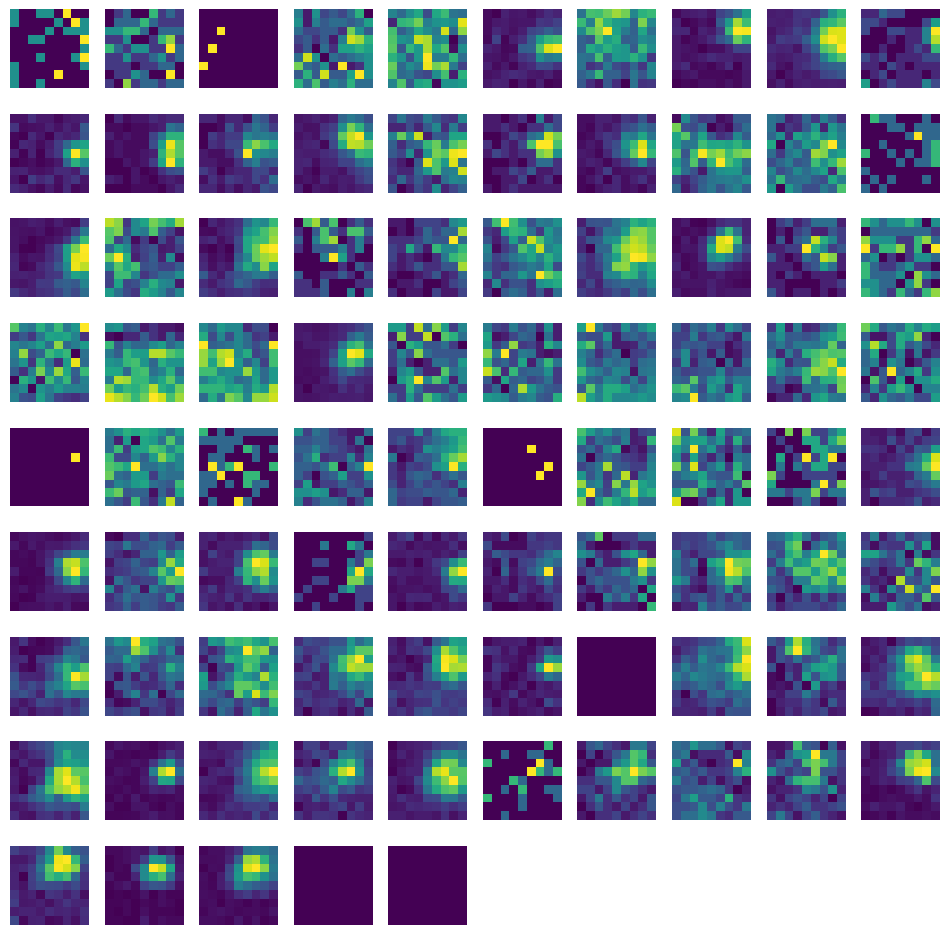

In [255]:
fig, axes = plt.subplots((len(unit_rfs)//10)+1, 10)
fig.set_size_inches(12, 12)

# handle case where there's <= 10 rfs
if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for irf, rf in enumerate(unit_rfs):
    ax_row = int(irf/10)
    ax_col = irf%10
    axes[ax_row][ax_col].imshow(rf, origin='lower')
for ax in axes.flat:
    ax.axis('off')